In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("bank_train.csv")
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,76,retired,married,secondary,no,2302.0,no,no,telephone,5,feb,110,1,87,2,failure,no
1,66,retired,divorced,unknown,no,53.0,no,no,cellular,12,jul,562,4,-1,0,unknown,yes
2,51,management,married,tertiary,no,2455.0,yes,no,cellular,21,jul,553,1,-1,0,unknown,yes
3,41,blue-collar,married,secondary,no,356.0,yes,no,cellular,14,may,90,5,-1,0,unknown,no
4,51,technician,married,secondary,no,-1944.0,yes,no,cellular,7,may,623,1,-1,0,unknown,yes


In [3]:
tc=train.corr()
print(tc)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.129043 -0.007330 -0.007839 -0.018284  0.002402  0.029582
balance   0.129043  1.000000  0.009142  0.015043 -0.031025  0.038155  0.044608
day      -0.007330  0.009142  1.000000 -0.013382  0.140019 -0.080303 -0.055446
duration -0.007839  0.015043 -0.013382  1.000000 -0.040431 -0.040912 -0.032467
campaign -0.018284 -0.031025  0.140019 -0.040431  1.000000 -0.104013 -0.040107
pdays     0.002402  0.038155 -0.080303 -0.040912 -0.104013  1.000000  0.486493
previous  0.029582  0.044608 -0.055446 -0.032467 -0.040107  0.486493  1.000000


In [4]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      1
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64

In [5]:
train=train.dropna()

In [6]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,76,retired,married,secondary,no,2302.0,no,no,telephone,5,feb,110,1,87,2,failure,no
1,66,retired,divorced,unknown,no,53.0,no,no,cellular,12,jul,562,4,-1,0,unknown,yes
2,51,management,married,tertiary,no,2455.0,yes,no,cellular,21,jul,553,1,-1,0,unknown,yes
3,41,blue-collar,married,secondary,no,356.0,yes,no,cellular,14,may,90,5,-1,0,unknown,no
4,51,technician,married,secondary,no,-1944.0,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,33,management,married,tertiary,no,133.0,yes,no,unknown,26,may,308,4,-1,0,unknown,no
4462,39,services,divorced,secondary,no,687.0,yes,no,cellular,9,jul,869,1,-1,0,unknown,yes
4463,40,admin.,single,secondary,no,2040.0,yes,no,cellular,18,may,906,2,350,2,failure,yes
4464,31,technician,single,secondary,no,628.0,yes,no,unknown,12,may,1083,2,-1,0,unknown,no


In [7]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
print(pd.crosstab(train['education'],train['deposit'],normalize=True))

deposit          no       yes
education                    
primary    0.079301  0.054435
secondary  0.274866  0.211470
tertiary   0.151658  0.185708
unknown    0.021057  0.021505


In [9]:
print(pd.crosstab(train['contact'],train['deposit']))

deposit      no   yes
contact              
cellular   1500  1739
telephone   151   154
unknown     701   219


<AxesSubplot:xlabel='deposit', ylabel='count'>

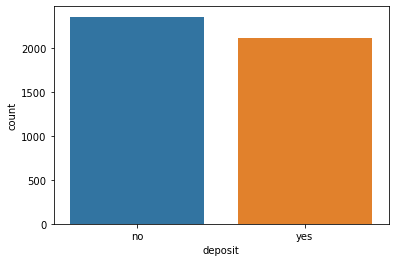

In [10]:
sns.countplot(data=train,x='deposit')

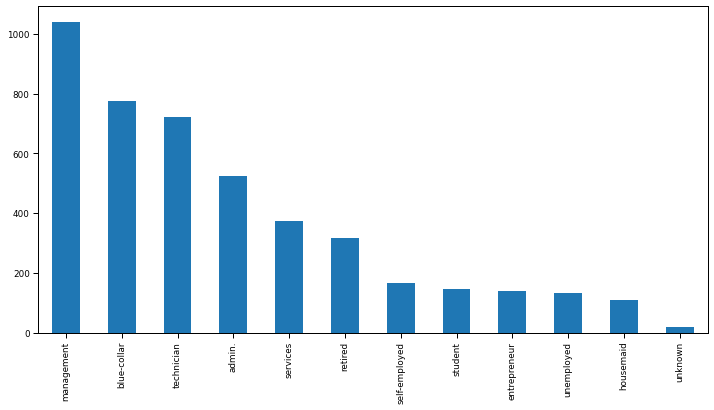

In [11]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(12,6));

In [12]:
train['deposit'].value_counts()

no     2352
yes    2112
Name: deposit, dtype: int64

In [13]:
train['marital'].value_counts()

married     2482
single      1472
divorced     510
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

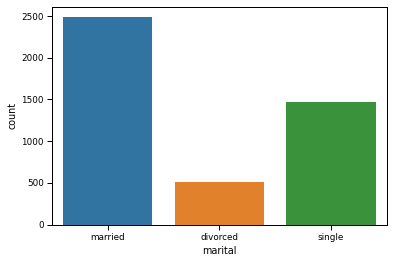

In [14]:
sns.countplot(data=train,x='marital')

<AxesSubplot:xlabel='marital', ylabel='count'>

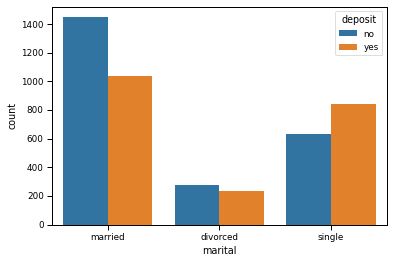

In [15]:
sns.countplot(data=train,x='marital',hue='deposit')

<AxesSubplot:xlabel='age', ylabel='Density'>

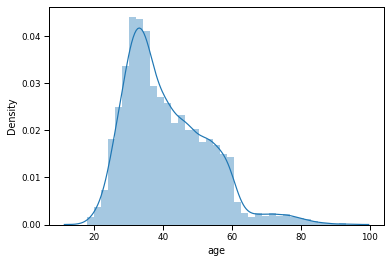

In [16]:
sns.distplot(train['age'])

<AxesSubplot:xlabel='age', ylabel='balance'>

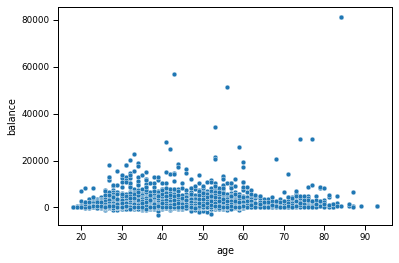

In [17]:
sns.scatterplot(x='age',y='balance',data=train)

In [18]:
train['deposit']=train['deposit'].map({'yes':1,'no':0})
train=pd.get_dummies(columns=['job','contact','marital','housing','loan','poutcome','default','month','education'],data=train)

In [19]:
train

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown
0,76,2302.0,5,110,1,87,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,66,53.0,12,562,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,51,2455.0,21,553,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41,356.0,14,90,5,-1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,51,-1944.0,7,623,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,33,133.0,26,308,4,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4462,39,687.0,9,869,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4463,40,2040.0,18,906,2,350,2,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4464,31,628.0,12,1083,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [20]:
x=train.drop(['deposit'],axis=1).values
y=train['deposit']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [24]:
test=pd.read_csv('bank_test.csv')
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,50,management,married,tertiary,no,0,no,no,cellular,30,jan,199,1,205,1.0,failure,no
1,50,admin.,married,secondary,no,715,no,no,cellular,28,aug,131,13,-1,0.0,unknown,no
2,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0.0,unknown,yes
3,39,technician,married,secondary,no,24,yes,no,cellular,28,jan,79,4,-1,0.0,unknown,no
4,35,blue-collar,married,secondary,no,563,no,yes,cellular,4,jun,147,1,119,3.0,failure,yes


In [25]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     1
poutcome     0
deposit      0
dtype: int64

In [26]:
test=test.dropna()

In [27]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [28]:
test['deposit']=test['deposit'].map({'yes':1,'no':0})
test=pd.get_dummies(columns=['job','contact','marital','housing','loan','poutcome','default','month','education'],data=test)

In [29]:
test

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown
0,50,0,30,199,1,205,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,715,28,131,13,-1,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,32,1168,16,411,1,-1,0.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,39,24,28,79,4,-1,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35,563,4,147,1,119,3.0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,32,-32,29,320,1,185,5.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1113,39,11854,15,15,9,-1,0.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1114,54,-361,26,227,1,-1,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1115,30,916,29,449,2,-1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
actual=test['deposit']
value=test.drop(['deposit'],axis=1).values

In [32]:
value.shape

(1116, 51)

In [33]:
predicted=lr.predict(value)

In [34]:
print(predicted)

[1 0 0 ... 0 1 0]


In [35]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(actual,predicted)
print(ac)

0.8010752688172043


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predicted)
print(cm)

[[506 100]
 [122 388]]


In [37]:
print('Misclassfied values: %d'%(actual!=predicted).sum())

Misclassfied values: 222
